<a href="https://colab.research.google.com/github/mayankdeshmukh/Data-Science-and-Machine-Learning/blob/main/Simple_Linear_Regression_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Linear Regression - Salary Data

###Problem Statement - Build a prediction model for salary hike.

##Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##Importing Dataset

In [4]:
dataset = pd.read_csv("/content/Salary_Data.csv")

In [5]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


##Independent and Dependent Variables

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [8]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

##Splitting The Dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
X_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [12]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [13]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [14]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

##Machine Learning Algorithm - Simple Linear Regression

In [15]:
#Fitting Simple Linear Rregression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
#Predicting the test set results
y_pred = regressor.predict(X_test)

In [17]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [18]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

##Measuring Accuracy

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
#Squared True returns MSE value, False returns RMSE value
mse = mean_squared_error(y_true = y_test, y_pred = y_pred) #Default = True
rmse = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred = y_pred)
rsquare = r2_score(y_true = y_test, y_pred = y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 2446.1723690465055
MSE: 12823412.298126549
RMSE: 3580.979237321343
MAPE: 0.042009635296206715
Adj.Rsquare: 0.988169515729126


##Data Visualization

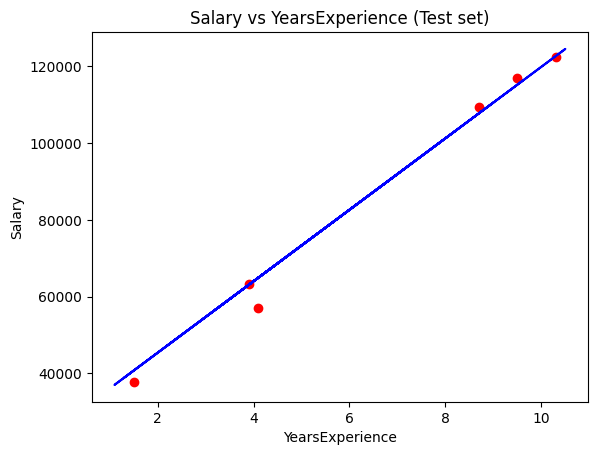

In [20]:
#Visualizing the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs YearsExperience (Test set)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

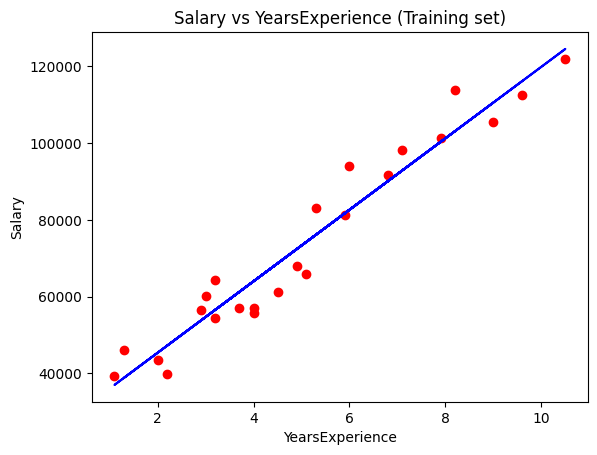

In [21]:
#Visualizing the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'Blue')
plt.title('Salary vs YearsExperience (Training set)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

##Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [23]:
X_train

array([[ 1.75832984],
       [-0.40973925],
       [ 0.09356251],
       [ 1.10016601],
       [-0.83560996],
       [ 0.01613147],
       [-0.7194634 ],
       [-0.21616165],
       [ 1.21631257],
       [ 0.6742953 ],
       [-1.45505827],
       [ 2.10676952],
       [-0.79689444],
       [-1.1066186 ],
       [ 0.32585562],
       [ 0.36457114],
       [-0.52588581],
       [-0.7194634 ],
       [ 1.52603672],
       [-1.18404964],
       [-1.53248931],
       [ 0.79044186],
       [-0.06129957],
       [-0.40973925]])

In [24]:
X_test

array([[-1.46136985],
       [ 1.19933112],
       [-0.67525365],
       [-0.73572413],
       [ 0.95744921],
       [ 0.7155673 ]])

##Machine Learning Algorithm - Simple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
#Predicting the test set results
y_pred = regressor.predict(X_test)

In [27]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [28]:
y_pred

array([ 38734.62911271, 102734.74576267,  57643.75448656,  56189.20638088,
        96916.55333995,  91098.36091723])

##Measuring Accuracy

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
#Squared True returns MSE value, False returns RMSE value
mse = mean_squared_error(y_true = y_test, y_pred = y_pred) #Default = True
rmse = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred = y_pred)
rsquare = r2_score(y_true = y_test, y_pred = y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 11106.086199756464
MSE: 195880417.86399832
RMSE: 13995.72855781357
MAPE: 0.10786746523994221
Adj.Rsquare: 0.8192867741723622


##Data Visualization

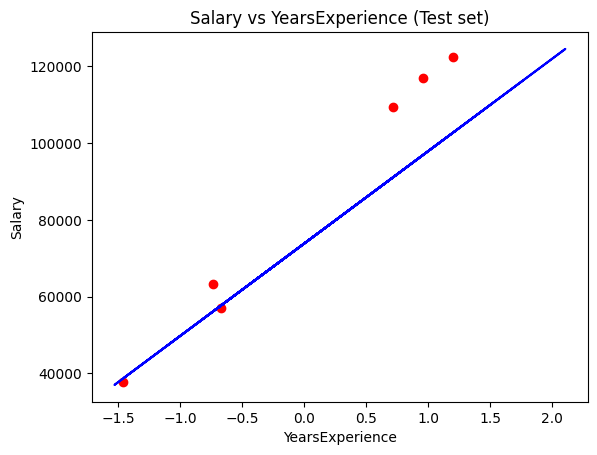

In [30]:
#Visualizing the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs YearsExperience (Test set)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

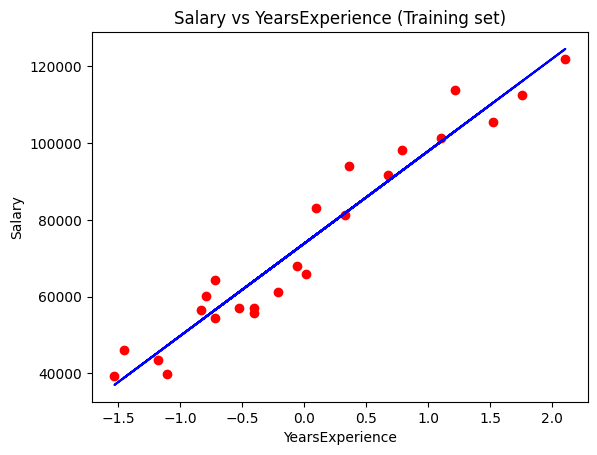

In [31]:
#Visualizing the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs YearsExperience (Training set)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()